<a href="https://colab.research.google.com/github/diezavala/DjangoDemo/blob/main/sonoma_shelter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Is The Stigma About Pitbulls True?

#### Diego Zavala and Conor Makowski
#### 3/12/2024 - 3/21/2024

## Introduction

#### This report will explore the data of some popular dog breeds from the Sonoma Animal Shelter. This report will answer these questions:
- Is the stigma about pit bulls being aggressive dogs true?
- Are pit bulls statistically more aggressive than other dogs in the shelter?
- Does the sex of the pit bull affect how aggressive they are?
- How are pit bulls affected in their stay at the shelter? Do they spend more days due to their stigma of being aggressive? Are they less likely to be adopted compared to other dogs?

#### By answering these questions based on the data from the shelter, we can come to a conclusion about the stigma about pit bulls being true and whether it affects the pit bulls in general.

The data we are using is coming from the County of Sonoma Department of Health Services from the Sonoma County Animal Shelter. We are using the version of the data from 03-12-2024. We will only be accounting for dogs in the shelter. The main variables we are going to work with are the breed, outcome subtype, intake type. We will also use other variables to a lesser degree, these are the sex and size of the dog.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-12-march-2024.csv')

## Initial Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27296 entries, 0 to 27295
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  20158 non-null  object 
 1   Type                  27296 non-null  object 
 2   Breed                 27296 non-null  object 
 3   Color                 27296 non-null  object 
 4   Sex                   27296 non-null  object 
 5   Size                  27260 non-null  object 
 6   Date Of Birth         20589 non-null  object 
 7   Impound Number        27296 non-null  object 
 8   Kennel Number         27286 non-null  object 
 9   Animal ID             27296 non-null  object 
 10  Intake Date           27296 non-null  object 
 11  Outcome Date          27133 non-null  object 
 12  Days in Shelter       27296 non-null  int64  
 13  Intake Type           27296 non-null  object 
 14  Intake Subtype        27296 non-null  object 
 15  Outcome Type       

In [ ]:
df.describe()

,Days in Shelter,Outcome Zip Code,Count
count,27296.000000,23402.000000,27296.000000
mean,19.253554,95010.772156,0.994505
std,36.691799,3820.278741,0.073928
min,0.000000,1922.000000,0.000000
25%,1.000000,95401.000000,1.000000
50%,9.000000,95404.000000,1.000000
75%,24.000000,95425.000000,1.000000
max,1239.000000,99701.000000,1.000000


This dataset contains 27296 rows of data. Each of these rows is one instance of an animal that was brought into the animal shelter and if/when they left. It has 24 columns that describe important information about each animal. The first 6 columns consist of general information about the animal such as their Name, Type of animal, Breed, Color, Sex, Size, and Date of Birth. The next 3 columns have some shelter assigned information such as the Impound Number, Kennel Number, and the Animal ID. The next couple of variables have to do with the intake and outcome information of the animal. The important ones here being the Intake Yype and Subtype as well as the Outcome Type and Subtype.

Text(0, 0.5, 'Frequency')

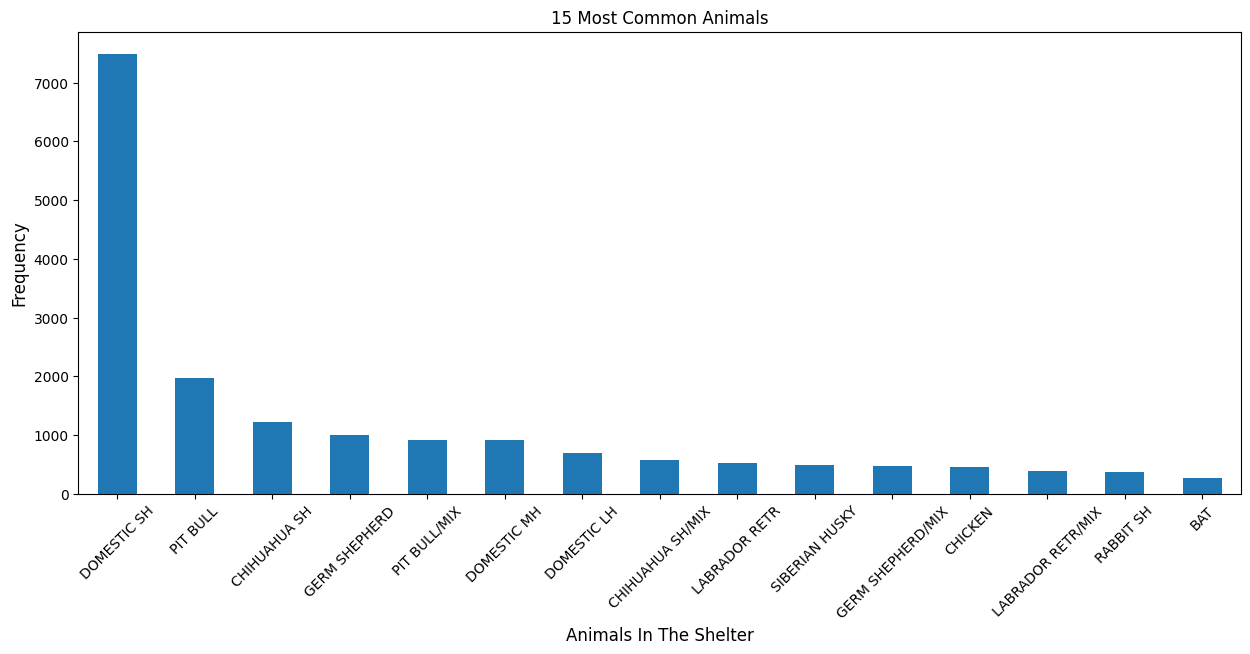

In [ ]:
plt.figure(figsize=(15, 6))
df['Breed'].value_counts().head(15).plot.bar(title="15 Most Common Animals", rot=45)
plt.xlabel("Animals In The Shelter", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

The 15 most common animals that go into the shelter consists mainly of dogs and cats with the most common animal being a Domestic Short Haired cat. Interestingly enough, there are also other animals such as the chicken, rabbit, and bat.

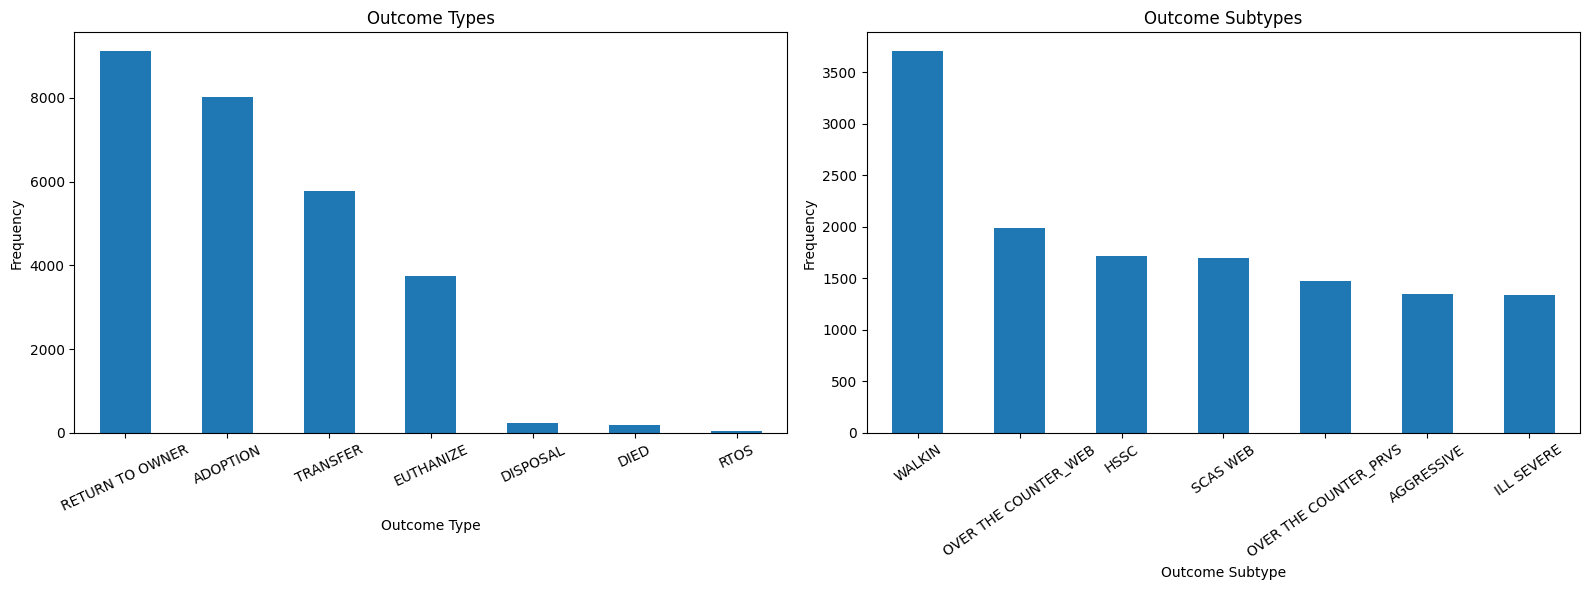

In [ ]:
plt.figure(figsize=(16, 6))  # Adjust the overall figure size
# First subplot
plt.subplot(1, 2, 1)
df['Outcome Type'].value_counts().head(7).plot.bar(title="Outcome Types", rot=25)
plt.xlabel("Outcome Type")
plt.ylabel("Frequency")

# Second subplot
plt.subplot(1, 2, 2)
df['Outcome Subtype'].value_counts().head(7).plot.bar(title="Outcome Subtypes", rot=35)
plt.xlabel("Outcome Subtype")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

The Outcome Type and Subtype variables show what happened to the animal. The most common outcome types are animals being returned to owner or being adopted. The next two most common are transfered and euthanized. After these four outcome types, the next few have a very low amount of animals that fall into the category so they will not be very useful. The outcome subtype has a very even distribution not counting walkins. The Rest of the subtypes are very close in total amount. The aggressive subtype will be very important to this report.

## Data preprocessing

In [ ]:
df_dogs = df[df['Type'] == 'DOG']

Here we create narrow down the dataframe to just the rows with the dog type.

In [ ]:
breed_replacements = {
    'PIT BULL/MIX': 'PIT BULL',
    'GERM SHEPHERD/MIX': 'GERM SHEPHERD',
    'CHIHUAHUA SH/MIX': 'CHIHUAHUA SH',
    'LABRADOR RETR/MIX': 'LABRADOR RETR',
    'PARSON RUSS TER/MIX': 'PARSON RUSS TER',
    'BORDER COLLIE/MIX': 'BORDER COLLIE'
}
for old_breed, new_breed in breed_replacements.items():
    df_dogs.loc[df_dogs['Breed'] == old_breed, 'Breed'] = new_breed

Here we are replacing merging the breeds of the top 7 dogs that are separate due to being a mix of two dog breeds. This way the data will be more confined and accurate.

In [ ]:
top_breeds = df_dogs['Breed'].value_counts().nlargest(7).index.tolist()
df_top_breeds = df_dogs[df_dogs['Breed'].isin(top_breeds)]

We are making the dataframe that we will be working with which is the all the data of the top 7 breeds.

In [ ]:
aggressive_dogs = df[(df['Type'] == 'DOG') & (df['Outcome Subtype'] == 'AGGRESSIVE') & (df['Breed'] == 'PIT BULL')]
filtered_data = df_top_breeds[df_top_breeds['Sex'].isin(['Male', 'Female'])]
size_order = ['X-LRG', 'LARGE', 'MED', 'SMALL', 'PUPPY']

This is filtering the data so we only get the rows with aggressive pit bulls that are male or female.

## Data exploration and visualization

What are the 7 most common dog breeds at the shelter?

Text(0.5, 0, 'Dog Breeds')

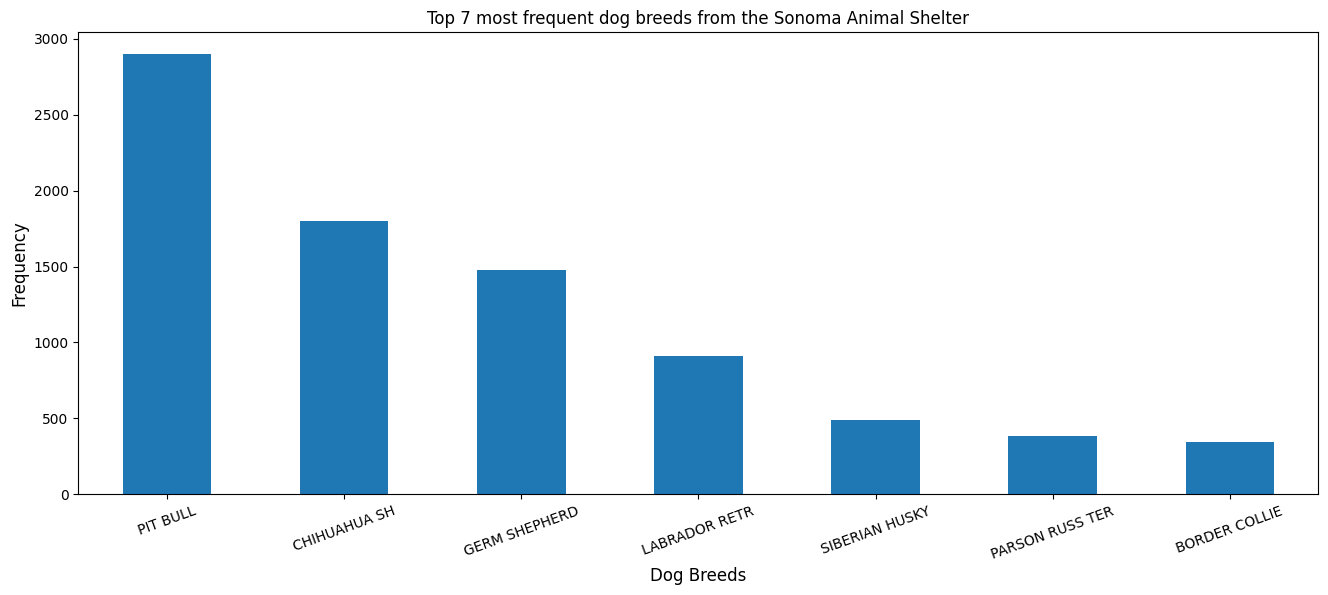

In [ ]:
plt.figure(figsize=(16, 6))
breed_counts = df_dogs['Breed'].value_counts()
top_7_breeds = breed_counts.head(7)

top_7_breeds.plot.bar(rot=20, title="Top 7 most frequent dog breeds from the Sonoma Animal Shelter")
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Dog Breeds", fontsize=12)

The bar plot above shows the 7 dogs with the highest frequency from the animal shelter data. This plot accounts for mixes of dogs being grouped together. For example pit bull mixes are in the same bar as normal pit bulls. We can see that pit bulls are the most common dog breed that shows up in the animal shelter. Other very popular dog breeds like chihuahua, german shephers, and labrador are in the top 7.

Which breed of the top 7 has the most dogs that are aggressive.

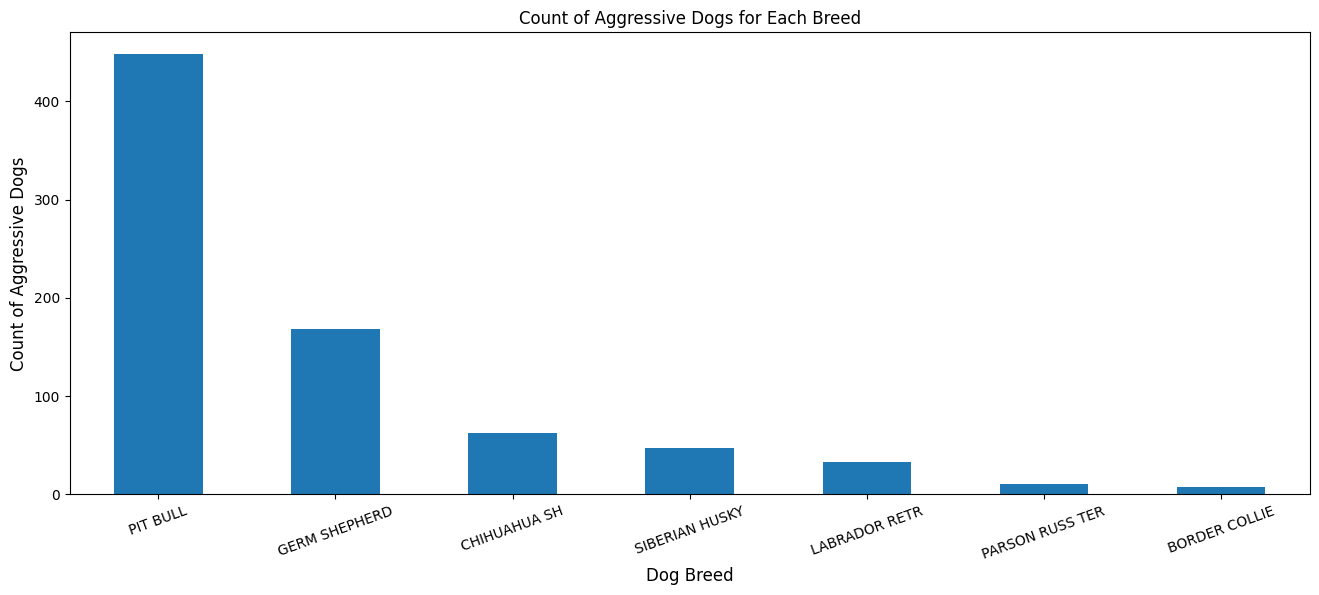

In [ ]:
plt.figure(figsize=(16, 6))
aggressive_counts = df_top_breeds[df_top_breeds['Outcome Subtype'] == 'AGGRESSIVE']['Breed'].value_counts()

aggressive_counts.plot.bar()
plt.title("Count of Aggressive Dogs for Each Breed")
plt.xlabel("Dog Breed", fontsize=12)
plt.ylabel("Count of Aggressive Dogs", fontsize=12)
plt.xticks(rotation=20)
plt.show()

This plot shows that the breed with the most aggressive dogs are pit bulls by a a lot. They have more than the other top 6 breeds combined with over 400. This is most likely due to pit bulls having the highest count of total dogs.
 This raises the question: Are pit bulls perceived as the most aggressive breed due to a higher proportion of aggressive pit bulls compared to other breeds? Or is it merely because there are more pit bulls overall, therefore contributing to a higher count of aggressive dogs?

<ipython-input-13-f3008dc57ee6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_breeds['IsAggressive'] = df_top_breeds['Outcome Subtype'].apply(lambda x: 1 if x == 'AGGRESSIVE' else 0)


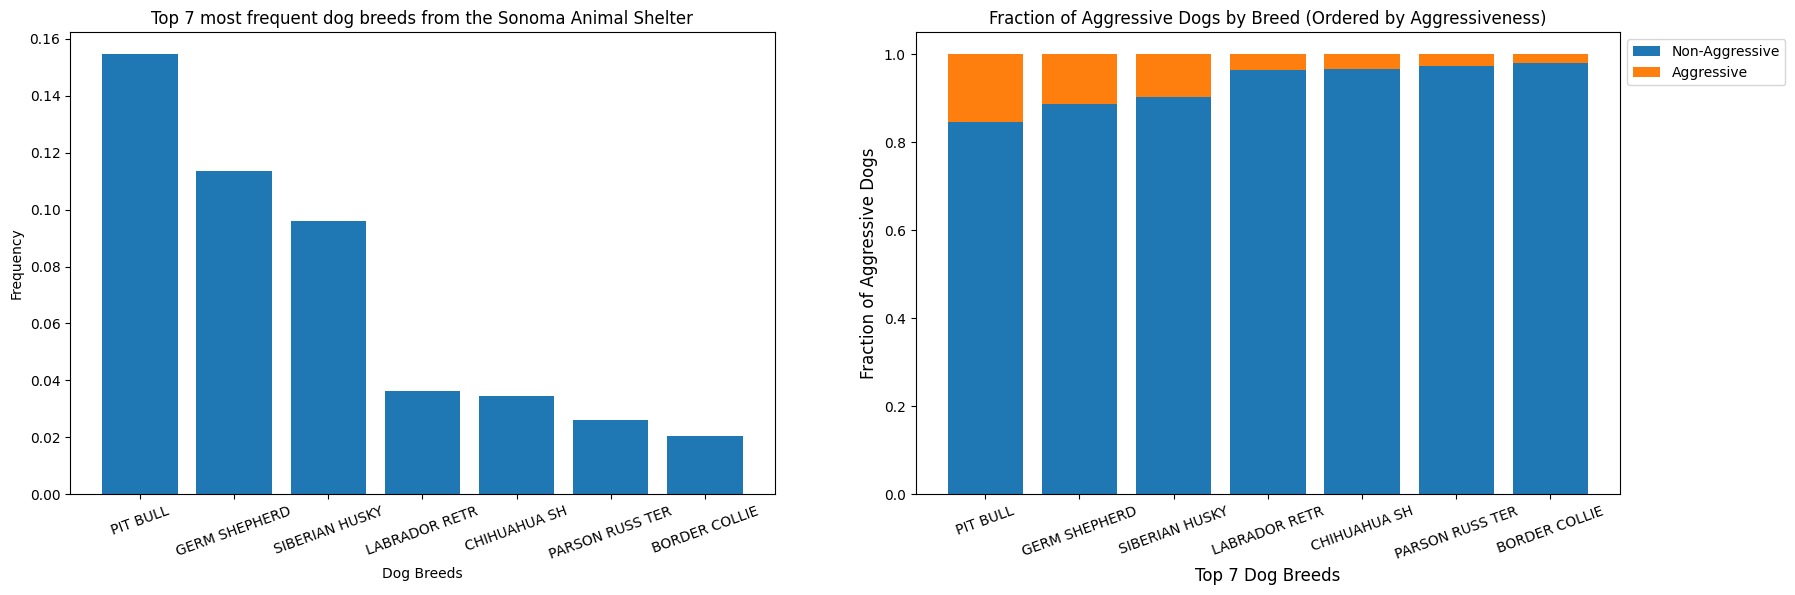

In [ ]:
#Creating the Aggressive fraction of dog breeds in the top 7
df_top_breeds['IsAggressive'] = df_top_breeds['Outcome Subtype'].apply(lambda x: 1 if x == 'AGGRESSIVE' else 0)
df_top_breeds_copy = df_top_breeds.copy()
df_agg = df_top_breeds_copy.groupby('Breed')['IsAggressive'].mean().reset_index()
df_agg_sorted = df_agg.sort_values(by='IsAggressive', ascending=False)
#Plotting the first plot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.bar(df_agg_sorted['Breed'], df_agg_sorted['IsAggressive'])
plt.title("Top 7 most frequent dog breeds from the Sonoma Animal Shelter")
plt.ylabel("Frequency")
plt.xlabel("Dog Breeds")
plt.xticks(rotation=20)

#Creating the Aggressive to Non-Aggressive proportion of dog breeds in the top 7
df_top_breeds_copy['IsNotAggressive'] = 1 - df_top_breeds_copy['IsAggressive']
df_agg = df_top_breeds_copy.groupby('Breed')[['IsAggressive', 'IsNotAggressive']].mean().reset_index()
df_agg_sorted = df_agg.sort_values(by='IsAggressive', ascending=False)
#Plotting the second plot
plt.subplot(1, 2, 2)
plt.bar(df_agg_sorted['Breed'], df_agg_sorted['IsNotAggressive'], label='Non-Aggressive')
plt.bar(df_agg_sorted['Breed'], df_agg_sorted['IsAggressive'], bottom=df_agg_sorted['IsNotAggressive'], label='Aggressive')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Top 7 Dog Breeds', fontsize=12)
plt.ylabel('Fraction of Aggressive Dogs', fontsize=12)
plt.title('Fraction of Aggressive Dogs by Breed (Ordered by Aggressiveness)')
plt.xticks(rotation=20)

plt.show()

These two plots show the percentage of dogs that are aggressive in the top 7 most frequent breeds. The left plot shows just the data for the aggressive percentage of dogs with pit bulls being the heighest percentage at close to 16 percent. The plot on the right shows the percentage of aggressive along with non aggressive to get a better visualization of the fraction of each breed that is aggressive.

As we can see, even though pit bulls are the most common dog the arrives to the shelter and have the most amount of aggressive sub-types, they also have the highest percentage of aggressiveness among their own breed. Although around 80 percent of pit bulls are non-aggresive, they still have the highest percentage of aggressiveness. This shows that pit bulls in the shelter are the most aggressive dog because the fraction of their aggressiveness is higher than the other breeds.

Now that we have confirmed that pit bulls are the most aggresive dogs in the shelter, which sex and size of pit bulls tend to account for the most aggressive.

Text(0, 0.5, 'Fraction of Different Sex')

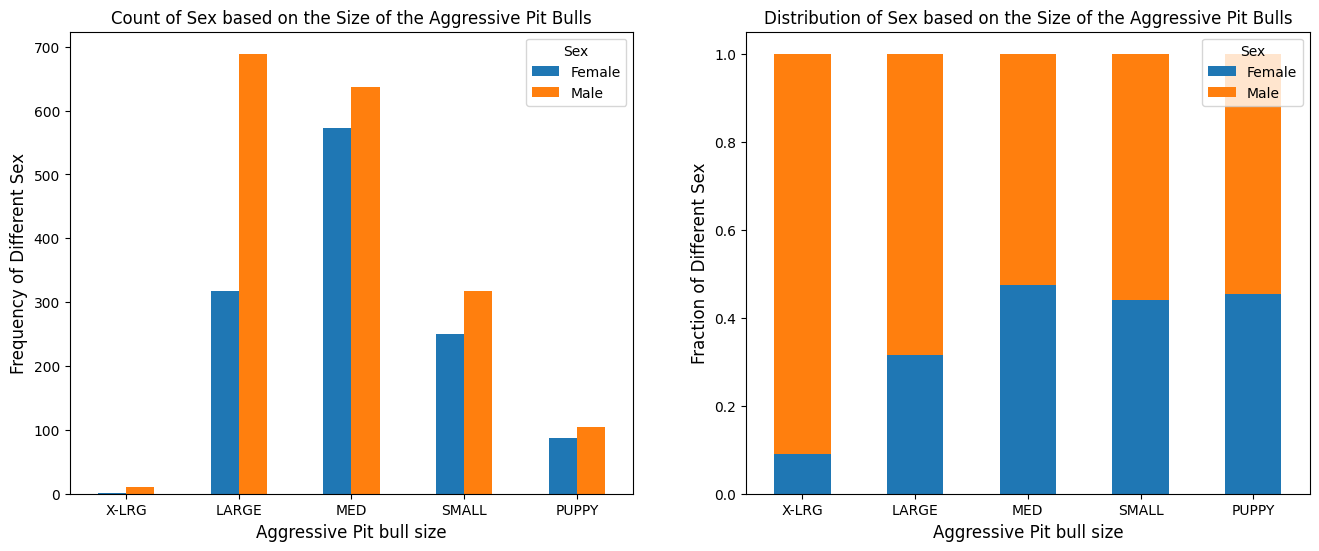

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,6))

pd.crosstab(filtered_data['Size'], filtered_data['Sex']).reindex(size_order).plot.bar(ax=ax[0],figsize=(16, 6),rot=0, title="Count of Sex based on the Size of the Aggressive Pit Bulls")
pd.crosstab(filtered_data['Size'], filtered_data['Sex'], normalize='index').reindex(size_order).plot.bar(ax=ax[1],stacked =True, rot=0, figsize=(16, 6), title="Distribution of Sex based on the Size of the Aggressive Pit Bulls")
ax[0].set_xlabel('Aggressive Pit bull size', fontsize=12)
ax[1].set_xlabel('Aggressive Pit bull size', fontsize=12)
ax[0].set_ylabel('Frequency of Different Sex', fontsize=12)
ax[1].set_ylabel('Fraction of Different Sex', fontsize=12)


#### The graph to the left shows the amount of aggressive pit bulls there are for each size and sex. Large, medium, and small account for the majority of the dogs so their fraction of male to female should hold more weight.

#### The graph to the right shows the distribution of sex for each size of aggressive pit bulls. For each size, there are more aggressive males than females, especially the larger sized dogs. So people looking to adopt a pit bull should probably look for a female since they tend to be less aggressive. With this we can come to a conclusion that the most aggressive dogs in the animal shelter tend to be large male pit bulls.

Now we can look into our final question and see if the fact that pit bulls are seen as aggressive affects if they get adopted less than other dogs.

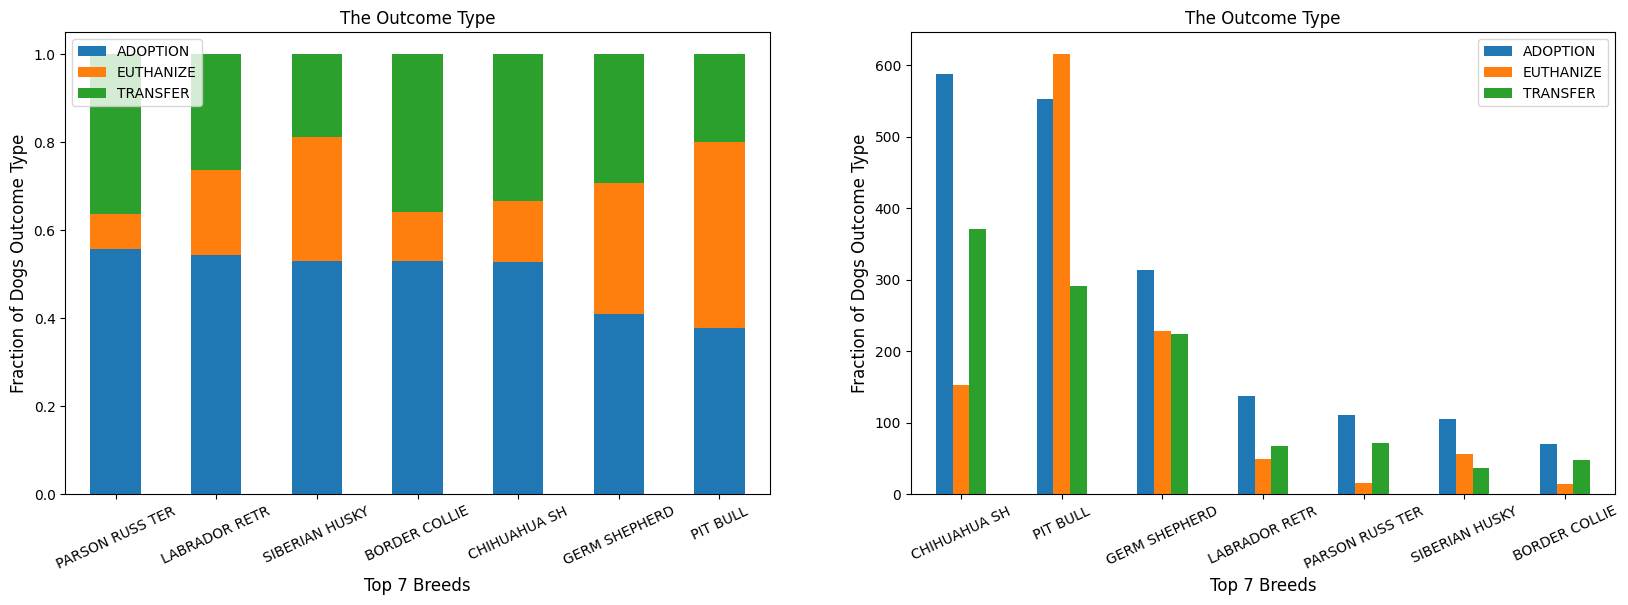

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(20,6))
filtered_data = df_top_breeds[df_top_breeds['Outcome Type'].isin(['EUTHANIZE', 'ADOPTION', 'TRANSFER'])]

pd.crosstab(filtered_data['Breed'], filtered_data['Outcome Type'], normalize='index').sort_values(by='ADOPTION', ascending=False).plot.bar(ax=ax[0], stacked=True, rot=25, title='The Outcome Type')
pd.crosstab(filtered_data['Breed'], filtered_data['Outcome Type']).sort_values(by='ADOPTION', ascending=False).plot.bar(ax=ax[1], rot=25, title='The Outcome Type')
ax[0].set_xlabel('Top 7 Breeds', fontsize=12)
ax[1].set_xlabel('Top 7 Breeds', fontsize=12)
ax[0].set_ylabel('Fraction of Dogs Outcome Type', fontsize=12)
ax[1].set_ylabel('Fraction of Dogs Outcome Type', fontsize=12)
ax[0].legend(loc="upper left")
ax[1].legend(loc="upper right")

Analyzing the graph, it's apparent that Pit Bulls show a higher proportion of being euthanized comapred to the other 6 breeds. Not accounting for dogs being returned to their owner, out of the dogs in the shelter that can be adopted, pit bulls have the lowest adoption rate compared to other popular dog breeds. The graph on the right shows that the amount of pit bulls that get adopted is second most but this does not accurately show that they get adopted at a higher rate because they just have more numbers.

Do pit bulls spend more time in the shelter compared to other dogs?

<ipython-input-16-9a3104dc2242>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_breeds['Days in Shelter_Bins'] = pd.cut(df_top_breeds['Days in Shelter'], bins=days, labels=days_labels)


Text(0, 0.5, 'Fraction of Outcome Type')

<Figure size 1600x800 with 0 Axes>

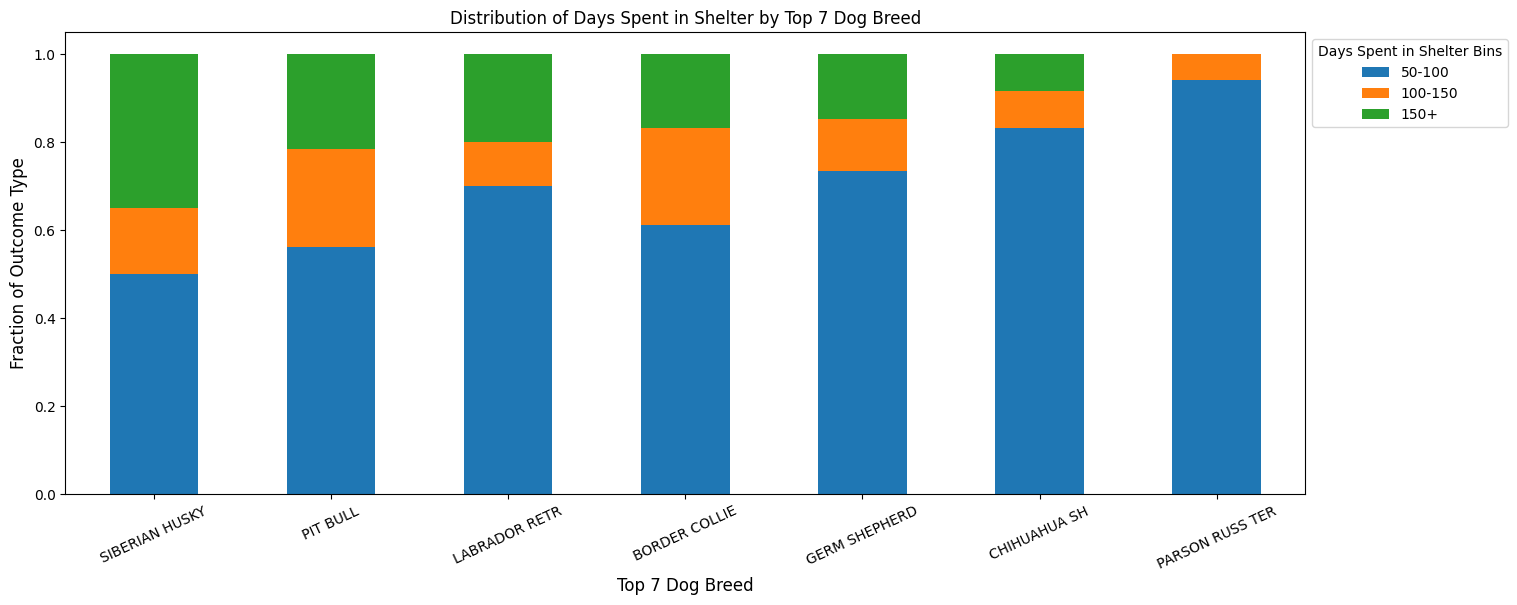

In [ ]:
days = [50, 100, 150, float('inf')]
days_labels = ['50-100', '100-150', '150+']
df_top_breeds['Days in Shelter_Bins'] = pd.cut(df_top_breeds['Days in Shelter'], bins=days, labels=days_labels)

plt.figure(figsize=(16, 8))
pd.crosstab(df_top_breeds['Breed'], df_top_breeds['Days in Shelter_Bins'], normalize='index').sort_values(by=['150+', '100-150'], ascending=False).plot.bar(title="Distribution of Days Spent in Shelter by Top 7 Dog Breed",figsize=(16, 6), rot=25, stacked=True)
plt.legend(title='Days Spent in Shelter Bins',bbox_to_anchor=(1, 1))
plt.xlabel("Top 7 Dog Breed", fontsize=12)
plt.ylabel("Fraction of Outcome Type", fontsize=12)

This graph shows the distribution of days spent in the shelter by the top 7 dogs. The days spent were grouped into 50-100 days, 100-150 days, and 150+. 0-50 days is not accounted for because the number was close for all 7 breeds which showed that most dogs dont spend too much time in the shelter. For the dogs that did spend more than 50 days in the shelter, pit bulls had the second highest percentage of dogs that stayed in the shelter for more than 150 days. This shows people's perception of pit bulls being aggressive is true because there is a higher percentage of pit bulls that spend over 100 days in the shelter compared to other dogs.

## Conclusions

#### We learned a lot from analyzing the data in this dataset. Our main findings can be summarized in two main points.
- 1. The stigma about pit bulls being aggressive is true according to the animal shelter dataset.
- 2. This makes people not want to adopt pit bulls as much as other dog breeds.

#### We found that pit bulls were the most common dog admitted to the shelter and thus had the highest number of dogs that were under the aggressive outcome subtype. We also found out that pit bulls have the highest percentage of aggressive to non-aggressive dogs out of the top 7 most common dog breeds. This shows that their high aggressive numbers are not based purely on them having higher admission numbers. Typically, large male dogs are the dogs that account for the majority of the aggressive pit bulls in the data. This is accurate to what people think of when imagining a viscious dog.
#### We discovered that pit bulls have the lowest adoption rate out of any of the top 7 dog breeds. We did not count being returned to owner because those dogs were most likely not up for adoption. As for the rest of them, pit bulls also had a high euthanization rate which is likely due to being aggressive. We also found out that there are more pit bulls that spend over 100 days in the shelter without being adopted thant most dog breeds. We came to the conclusion that people are hesitant to adopt pit bulls because of their aggressive stigma, therefore pit bulls end up spending more days in the shelter waiting to be adopted.
#### Another key takeaway from this report is that although pit bulls had the highest aggressive rate, it was still only around 16 percent. This means that if someone were to adopt a pit bull, the chances that they are not aggressive is close to 80 percent.